<a href="https://colab.research.google.com/github/SonalikaSingh/Bank_customer_churning/blob/main/Bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5909,5910,15713043,Siciliani,691,France,Female,33,6,0.00,2,1,1,100408.31,0
3605,3606,15788683,Kang,588,Germany,Female,34,10,129417.82,1,1,0,153727.32,0
6008,6009,15700937,Romano,767,Spain,Female,24,5,0.00,2,1,1,67445.85,0
5234,5235,15668323,Mbadiwe,678,France,Female,41,1,143443.61,1,1,0,196622.28,1
8979,8980,15742511,Gordon,514,France,Male,35,3,121030.90,1,1,0,10008.68,0


Checking if the dataset is imbalanced or not

In [3]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

We can use seaborn to create a simple heatmap to see where data is missing

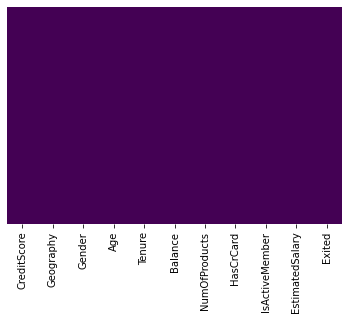

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Changing datatype of gender to int

In [7]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

Dummy variables to convert geography object into int

In [8]:
x=pd.get_dummies(df.Geography)

In [9]:
#Concatenation in pandas to join two dataframes
merged=pd.concat([df,x],axis='columns')

In [10]:
#Dropping original geography column
final=merged.drop('Geography',axis='columns')

In [11]:
final.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


Machine learns better if values are between 0 and 1.

In [12]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final[cols_to_scale] = scaler.fit_transform(final[cols_to_scale])

In [13]:
final.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [14]:
X = final.drop('Exited',axis='columns')
y = final['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
X_train[:5]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0


In [16]:
len(X_train.columns)

12

Building ANN model in keras

In [17]:


import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=12, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [18]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 944us/step - loss: 0.5221 - accuracy: 0.7653
Epoch 2/100
250/250 [==============================] - 0s 926us/step - loss: 0.4597 - accuracy: 0.8040
Epoch 3/100
250/250 [==============================] - 0s 989us/step - loss: 0.4432 - accuracy: 0.8087
Epoch 4/100
250/250 [==============================] - 0s 882us/step - loss: 0.4316 - accuracy: 0.8146
Epoch 5/100
250/250 [==============================] - 0s 951us/step - loss: 0.4229 - accuracy: 0.8196
Epoch 6/100
250/250 [==============================] - 0s 974us/step - loss: 0.4132 - accuracy: 0.8250
Epoch 7/100
250/250 [==============================] - 0s 955us/step - loss: 0.4027 - accuracy: 0.8280
Epoch 8/100
250/250 [==============================] - 0s 945us/step - loss: 0.3917 - accuracy: 0.8329
Epoch 9/100
250/250 [==============================] - 0s 951us/step - loss: 0.3837 - accuracy: 0.8400
Epoch 10/100
250/250 [==============================] - 0s 991us/step - l

**Handelling Imbalanced dataset**
**METHOD1:UNDERSAMPLING**

In [21]:
final_class_0

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0,1,0,0
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.588,0,0.135135,0.7,0.618021,0.000000,1,0,0.145854,0,1,0,0
9994,0.900,1,0.148649,0.2,0.000000,0.333333,0,0,0.838890,0,1,0,0
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0


In [49]:
final.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:

# Class count
count_class_0, count_class_1 = final.Exited.value_counts()

# Divide by class
final_class_0 = final[final['Exited'] == 0]
final_class_1 = final[final['Exited'] == 1]

In [22]:
# Undersample 0-class and concat the DataFrames of both class
final_class_0_under = final_class_0.sample(count_class_1)
final_test_under = pd.concat([final_class_0_under, final_class_1], axis=0)
print('Random under-sampling:')
print(final_test_under.Exited.value_counts())

Random under-sampling:
1    2037
0    2037
Name: Exited, dtype: int64


In [23]:
X = final_test_under.drop('Exited',axis='columns')
y = final_test_under['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [24]:
# Number of classes in training Data
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [25]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5529
Epoch 2/100
102/102 [==============================] - 0s 972us/step - loss: 0.6512 - accuracy: 0.6468
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.6628
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.6640
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.6800
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.6784
Epoch 7/100
102/102 [==============================] - 0s 973us/step - loss: 0.5895 - accuracy: 0.6886
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.6944
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7021
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5742 - ac

METHOD2:Oversampling minority class by duplication

In [26]:

# Class count
count_class_0, count_class_1 = final.Exited.value_counts()

# Divide by class
final_class_0 = final[final['Exited'] == 0]
final_class_1 = final[final['Exited'] == 1]

In [28]:
# Oversample 1-class and concat the DataFrames of both class
final_class_1_over = final_class_1.sample(count_class_0,replace=True)
final_test_over = pd.concat([final_class_0, final_class_1_over], axis=0)
print('Random over-sampling:')
print(final_test_over.Exited.value_counts())

Random over-sampling:
1    7963
0    7963
Name: Exited, dtype: int64


In [29]:
X = final_test_over.drop('Exited',axis='columns')
y = final_test_over['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [30]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6430 - accuracy: 0.6359
Epoch 2/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.6848
Epoch 3/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7197
Epoch 4/100
399/399 [==============================] - 0s 975us/step - loss: 0.5183 - accuracy: 0.7495
Epoch 5/100
399/399 [==============================] - 0s 983us/step - loss: 0.4957 - accuracy: 0.7589
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7651
Epoch 7/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7635
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7650
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7701
Epoch 10/100
399/399 [==============================] - 0s 963us/step - loss: 0.4682 - 

METHOD3:SMOTE-->Synthetic minority oversampling technique

In [31]:
X = final.drop('Exited',axis='columns')
y = final['Exited']

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

#y_sm.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [37]:
y_train.shape

(12740,)

In [38]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 970us/step - loss: 0.6509 - accuracy: 0.6200
Epoch 2/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.6901
Epoch 3/100
399/399 [==============================] - 0s 990us/step - loss: 0.5573 - accuracy: 0.7217
Epoch 4/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.7464
Epoch 5/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7604
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7723
Epoch 7/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7727
Epoch 8/100
399/399 [==============================] - 0s 975us/step - loss: 0.4660 - accuracy: 0.7765
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.7783
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4591 - 

METHOD4:Ensemble with undersampling

In [39]:
# Regain Original features and labels
X = final.drop('Exited',axis='columns')
y = final['Exited']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [41]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

model1 --> class1(1630) + class0(0, 1630)

model2 --> class1(1630) + class0(1630, 3260)

model3 --> class1(1630) + class0(3260, 4890)

model4 --> class1(1630) + class0(4890,6370)

In [42]:
df3 = X_train.copy()
df3['Exited'] = y_train

In [43]:
df3.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
5710,0.856,0,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,1,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,1,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,0,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0,1
8967,0.970,0,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [44]:
df3_class0 = df3[df3.Exited==0]
df3_class1 = df3[df3.Exited==1]

In [45]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [46]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1630)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5405
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6113
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.6540
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.6712
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.6798
Epoch 6/100
102/102 [==============================] - 0s 991us/step - loss: 0.5987 - accuracy: 0.6896
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.6991
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.6975
Epoch 9/100
102/102 [==============================] - 0s 974us/step - loss: 0.5696 - accuracy: 0.7098
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5607 - ac

In [52]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1630, 3260)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 0s 980us/step - loss: 0.6836 - accuracy: 0.5574
Epoch 2/100
102/102 [==============================] - 0s 994us/step - loss: 0.6455 - accuracy: 0.6298
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.6521
Epoch 4/100
102/102 [==============================] - 0s 955us/step - loss: 0.6068 - accuracy: 0.6798
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.6828
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.6917
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.6914
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.6951
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.6988
Epoch 10/100
102/102 [==============================] - 0s 983us/step - loss: 0.5681 

In [53]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 3260, 4890)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6818 - accuracy: 0.5712
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.6509
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.6647
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.6779
Epoch 5/100
102/102 [==============================] - 0s 940us/step - loss: 0.5896 - accuracy: 0.6887
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7006
Epoch 7/100
102/102 [==============================] - 0s 981us/step - loss: 0.5711 - accuracy: 0.7132
Epoch 8/100
102/102 [==============================] - 0s 964us/step - loss: 0.5580 - accuracy: 0.7209
Epoch 9/100
102/102 [==============================] - 0s 983us/step - loss: 0.5494 - accuracy: 0.7230
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5403 

In [54]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 4890, 6370)

y_pred4 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 0s 988us/step - loss: 0.6973 - accuracy: 0.5315
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6299
Epoch 3/100
98/98 [==============================] - 0s 962us/step - loss: 0.6280 - accuracy: 0.6518
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.6691
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.6807
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.6916
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.6987
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.7051
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7048
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7055
Epoch

In [55]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]+y_pred4[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [56]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.45      0.78      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000

